In [1]:
#load
from sklearn.datasets import load_iris
iris= load_iris()
iris

In [4]:
X = iris.data
Y = iris.target

In [7]:
from sklearn.model_selection import  train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.4, random_state=1)


In [8]:
from sklearn.naive_bayes import  GaussianNB
gnb = GaussianNB()
results= gnb.fit(X_train,Y_train)
results


GaussianNB()

In [9]:
Y_pred= gnb.predict(X_test)
Y_pred

array([0, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1])

In [13]:
from sklearn import metrics

# Y_test is the true labels, Y_pred is the model's predictions
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred)*100)


Accuracy: 95.0


txt classific
**bold text**

In [14]:
from sklearn.datasets import fetch_20newsgroups
data= fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [15]:
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train= fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)
test= fetch_20newsgroups(subset='test',categories=categories,shuffle=True,random_state=42)
print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [16]:
train.target

array([2, 2, 1, ..., 2, 3, 1])

tf-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model= make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
labels= model.predict(test.data)

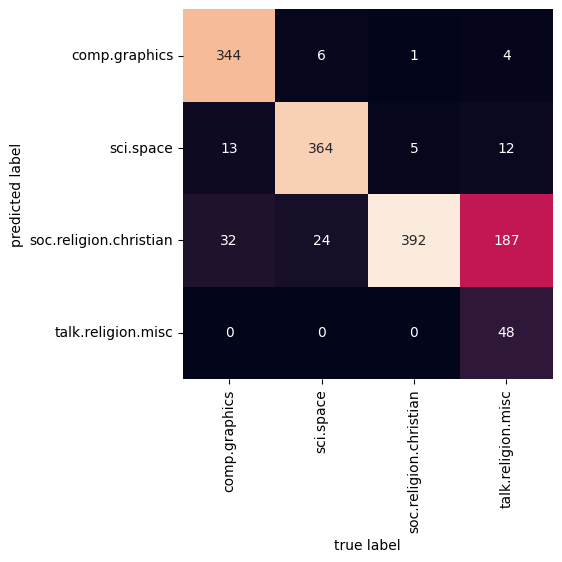

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat= confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [19]:
def predict_category(s,train=train,model=model):
  pred= model.predict([s])
  return train.target_names[pred[0]]

In [20]:
predict_category('sending a payload to the ISS')

'sci.space'

In [21]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [22]:
predict_category('determining the screen resolution')

'comp.graphics'